### main content:
1) get data ready 
2) build or pick a pretrained model ( loss function)
3) fit the model to the data and make a prediction
4) evaluate the model
5) imporve through experimentation
6) save and reload the trained model

In [431]:
#importing
import pandas as pd
import numpy as np
import torch
import sklearn
import matplotlib.pyplot as plt
from torch import nn

torch.__version__



'2.7.0+cu126'

Data can be anything (excel spreadhsheet, images,vido, audio)
Our aim in machine learning is to:
1) get data into a numerical representation
2) build a model to learn patterns in the numberical representation

we are gonna use linear regression now


In [432]:
# create known parameters
weight = 0.7
bias = 0.3

#create
start = 0 
end = 1
step = 0.02
x = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight*x + bias
x[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

### splitting data into testing and training data sets (one of the more important concepts)

In [433]:
# creating a train/test split

train_split = int(0.8*len(x))
x_train = x[:train_split]
y_train = y[:train_split]
x_test = x[train_split:]
y_test = y[train_split:]

len(x_train),len(y_train),len(x_test),len(y_test)

(40, 40, 10, 10)

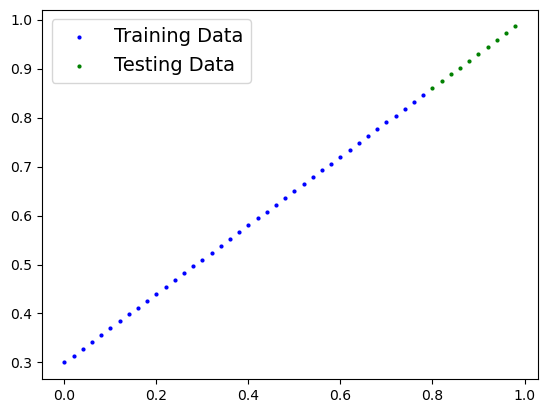

In [434]:
#visualisation

def plot_predictions(train_data=x_train,train_labels =y_train,test_data=x_test,test_labels=y_test,predictions = None):
    plt.scatter(train_data,train_labels,c="b",s=4,label = "Training Data")
    plt.scatter(test_data,test_labels,c="g",s=4,label = "Testing Data")
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r",label="Predictions")

    plt.legend(prop={"size":14})

plot_predictions()  


In [435]:
# building my first pytorch model
from torch import nn
class  LinearRegressionModel(nn.Module):
    def __init__(self ):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float)) 
        self.bias = nn.Parameter(torch.rand(1,requires_grad=True,dtype=torch.float))
    def forward(self, x:torch.tensor)-> torch.Tensor:
        return self.weights*x + self.bias
     

### pytorch model building essentials

torch.nn - contains all of the buildings for computational graphs (a neural network can be considered as it)

torch.nn.Paramter - what parameters our model should try to learn

torch.nn.Module - the base class of all neural network modeules, if you subclass it, you should overwrite forward

torch.optim - optimisers in pytorch

In [436]:
torch.manual_seed(42)

#creating and instance of the model

model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.3904], requires_grad=True)]

In [437]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.3904]))])

### making prediction using "torch.inference_mode()"
to check predictive power, lets see how well it predicts y)test based on x_Test

In [438]:
x_test,y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [439]:
with torch.inference_mode():
    y_preds = model_0(x_test)

y_preds



tensor([[0.6598],
        [0.6665],
        [0.6733],
        [0.6800],
        [0.6867],
        [0.6935],
        [0.7002],
        [0.7069],
        [0.7137],
        [0.7204]])

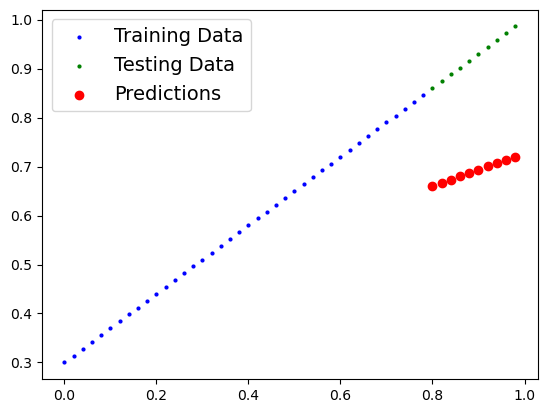

In [440]:
plot_predictions(predictions=y_preds)

In [441]:
# using mean absolute error as our loss function, and stochastic gradient descene as optimiser
loss_fn = nn.L1Loss()
optimiser = torch.optim.SGD(params=model_0.parameters(),lr=0.01) 

### Building a training loop and a testing loop in pytorch
A couple of things we need in a training loop:
1) loop through the data
2) forwared pass (moving data through our data' forward() functions)
3) calculate the loss (compare forward pass predictions to ground truth tables)
4) optimizer zero grad
5) loss backward - move backwards through the network to calculate the gradients of each of the paramters
6) optimser step

In [452]:

torch.manual_seed(42)
# an epoch is 1 loop through the data
epochs = 100

# 1. loop through the data
for epoch in range(epochs):
    model_0.train() #train mode sets all the patterns that require gradients to require gradients
    #2. forawrd pass
    y_pred = model_0(x_train)

    #3.calculate the loss
    loss = loss_fn (y_pred,y_train)
    

    #4. optimizer zero grad
    optimiser.zero_grad()

    #5. perform backpropogation on the loss with respect to the parameters of the model
    loss.backward()

    #6. step the optimiser
    optimiser.step()
    
    model_0.eval() # stops training mode
print(f"Loss: {loss}")

Loss: 0.006556747946888208


In [453]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6962])), ('bias', tensor([0.3064]))])

In [454]:
weight,bias

(0.7, 0.3)

In [455]:
with torch.inference_mode():
    y_preds_new = model_0(x_test)

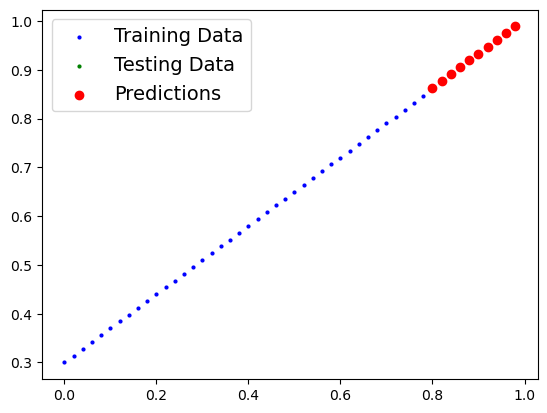

In [456]:
plot_predictions(predictions=y_preds_new)